#Problem Statement:

##Data Set:https://archive.ics.uci.edu/dataset/2/adult

##Dataset taken from UCI ML Repo

###The problem is that people of certain backgrounds, origins, education levels, or age have different income levels. The goal with this project is to create a prediction algorithm that predicts the income brackets of different groups of people, so that different companies know their target demographics a little better. For example, by understanding that perhaps 40 year olds make more than 20 year olds, a company could pivot to selling lower cost budget products to a 20 year old audience. The prediction part of this project will allow for companies to keep files of induvidual customers based on the info they have on them and use this info to predict their income level, allowing for better catering to their specific desires. This project could be useful to mass market companies like amazon who offer a wide variety of products for different kinds of people. This is a Classification problem, and it's very likely that there are outliars and things to be cleaned in the dataset. To this extent, utilizing some form of data preprocessing coupled with random forest classification could produce a working algorithm.

##Stakeholders: Everyone who stands to gain profit off of products purchased on an online store. For example The company running the online store, the company that is selling the products on said online store, and even the Customers are stakeholders as what products they are recommended can hold some affect on them.



#Exploratory Data Analysis

###Data was obatined from UCI ML Repo and is in the form of pandas data frame

###Description: This data set is a set of adults which provides features on their occupation, marital-status, education, relationship, race, age, sex, capital-gain, capital-loss, hours worked every week, native-country, and workclass as well as their income. Income in this case is what we want to predict so the income will be set to a different dataframe. All the data is treated as categorial in this model, and there are 714315 total pieces of data stored in the dataframe and there are 48842 rows of data in this dataset. All data collected from a 1994 census.

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [3]:
# Citation
print("Citation:\n", "UCI Machine Learning Repository. (n.d.).\n https://archive.ics.uci.edu/dataset/2/adult")

Citation:
 UCI Machine Learning Repository. (n.d.).
 https://archive.ics.uci.edu/dataset/2/adult


In [4]:
# More information
print("Check out this data set on the UCI ML Repository for more information:")
print("https://archive.ics.uci.edu/dataset/2/adult")

Check out this data set on the UCI ML Repository for more information:
https://archive.ics.uci.edu/dataset/2/adult


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)
#append test column to this dataframe
df_concat = pd.concat([X, y], axis=1)
df_concat.head()
df_concat.drop('fnlwgt', axis=1, inplace=True)


##Preprocessing:

In [7]:
#remove all rows that lack 1 or more features
print(df_concat.size)
df_concat.dropna(inplace=True)
print(df_concat.size)
#no NaN values seen


683788
666694


In [8]:
#set our X data frame to the concatenated data frame
X = df_concat


In [9]:
#iterate through income column and change all <= 50k. to <=50k
X['income'] = X['income'].replace({
    '<=50K.': '<=50K',
    '>50K.': '>50K'
})
y = X['income']

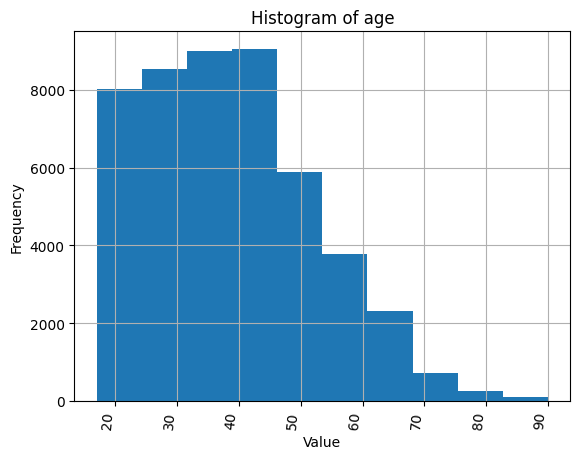

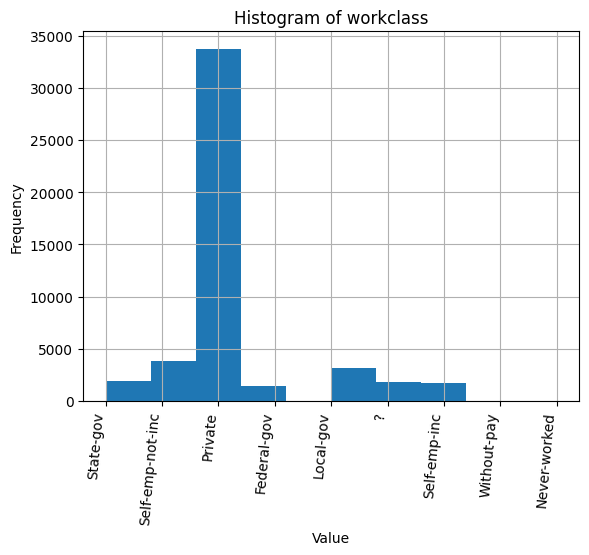

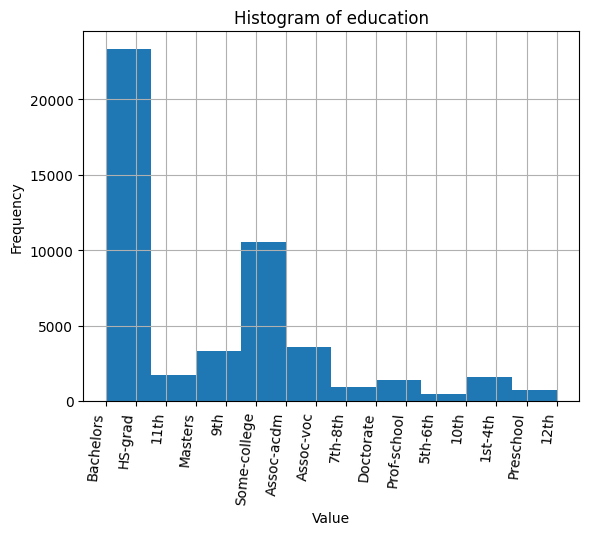

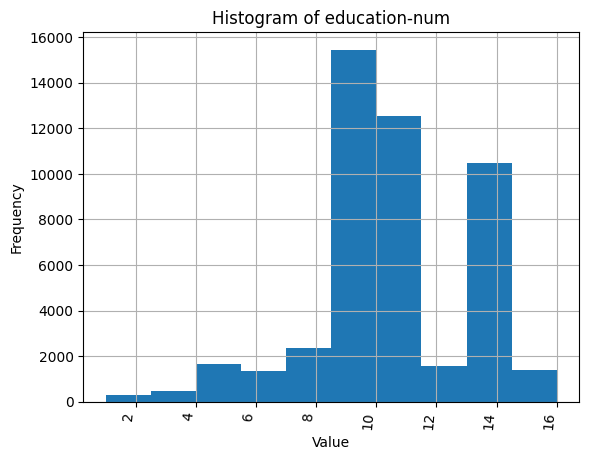

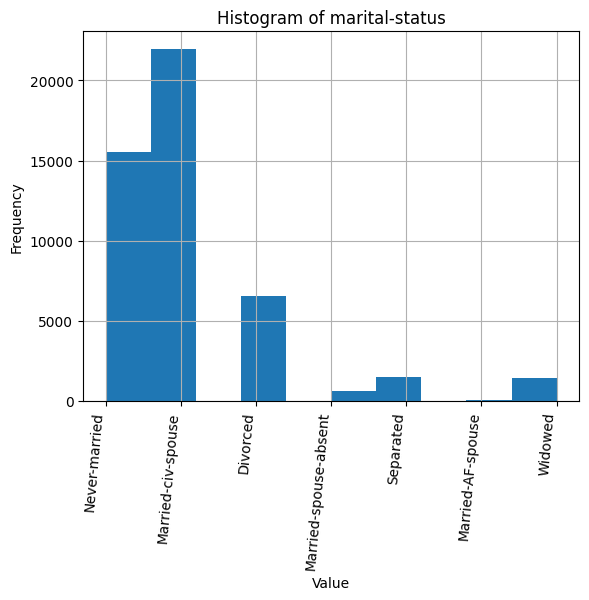

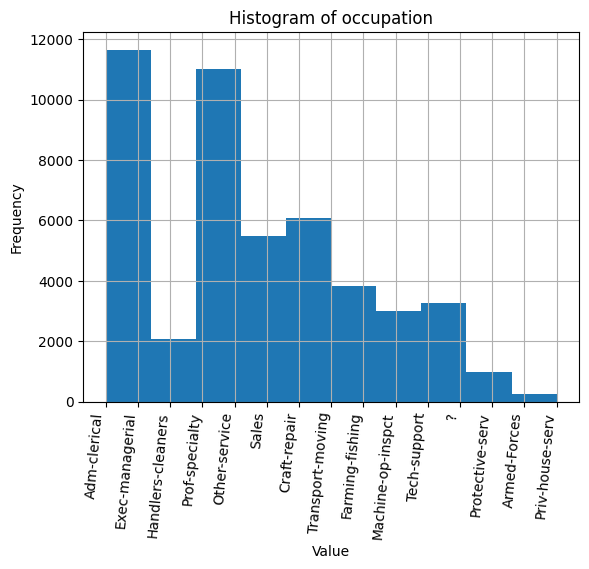

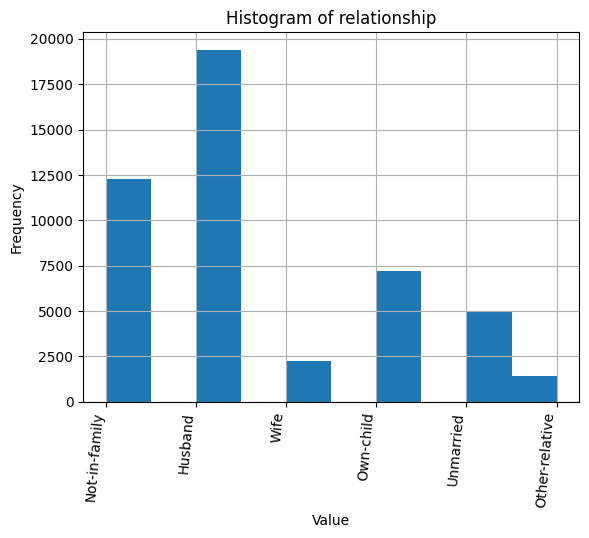

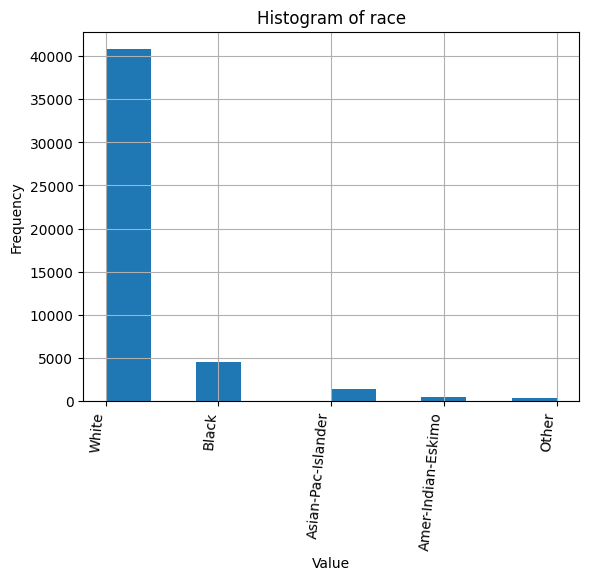

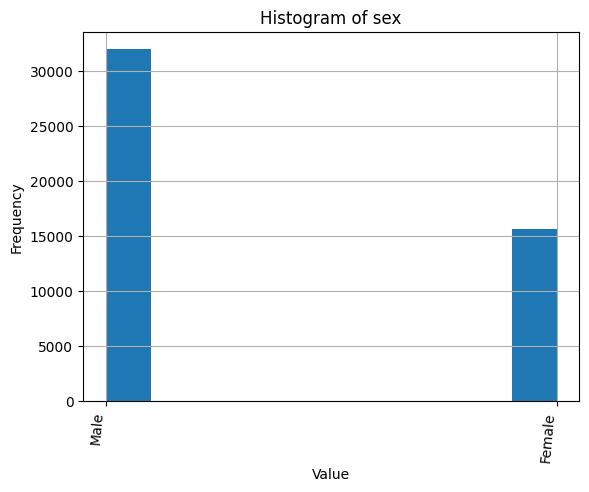

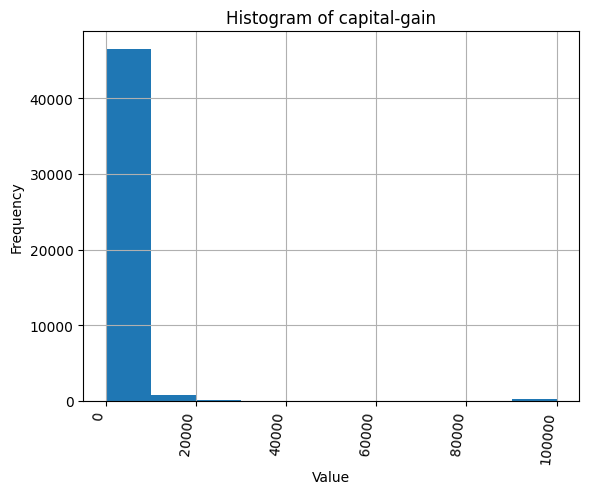

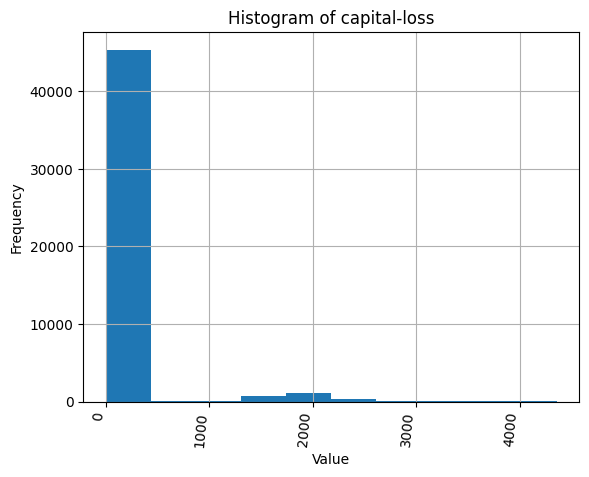

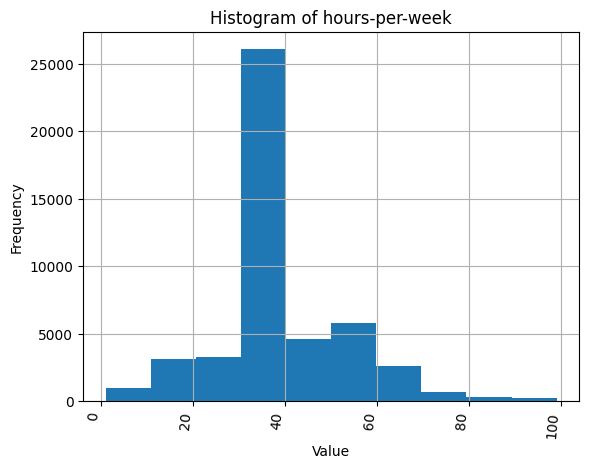

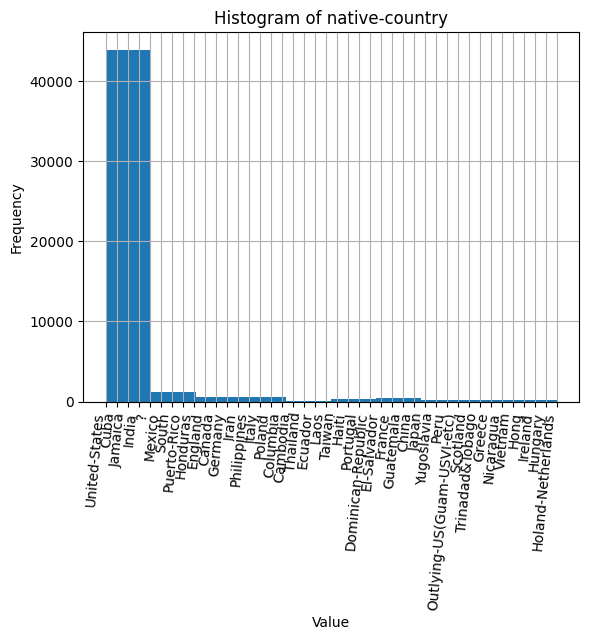

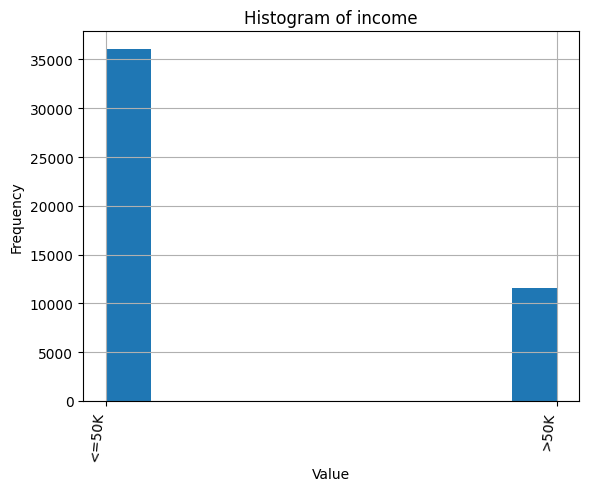

In [10]:
#create a frequency graph for each column

features = X.columns
for feature in features:
  X[feature].hist()
  plt.title('Histogram of ' + feature)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.xticks(rotation=85, ha='right')
  plt.show()



In [11]:
#print mean, median and standard deviation
X.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000
mean,38.640684,10.090821,1091.137649,87.853489,40.600050
std,13.558961,2.568320,7487.228336,404.010612,12.260345
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [12]:
#contingency table for every variable relation to income
from scipy.stats import chi2_contingency
features = X.columns
for feature in features:
  if feature != 'income':
    print(feature + ":")
    contingency_table = pd.crosstab(X[feature], X['income'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("Chi-squared statistic:", chi2)
    print("P-value:", p)
    print("Degrees of freedom:", dof)

#Notably all variables are useful and have a statistically significant association with income, as the p-value for each feature is under 0.05



age:
Chi-squared statistic: 5003.703068883917
P-value: 0.0
Degrees of freedom: 73
workclass:
Chi-squared statistic: 1448.9104119750882
P-value: 1.5023969245053269e-307
Degrees of freedom: 8
education:
Chi-squared statistic: 6353.001625468278
P-value: 0.0
Degrees of freedom: 15
education-num:
Chi-squared statistic: 6353.001625468278
P-value: 0.0
Degrees of freedom: 15
marital-status:
Chi-squared statistic: 9565.861362812191
P-value: 0.0
Degrees of freedom: 6
occupation:
Chi-squared statistic: 5758.5623693486705
P-value: 0.0
Degrees of freedom: 14
relationship:
Chi-squared statistic: 9823.760155981909
P-value: 0.0
Degrees of freedom: 5
race:
Chi-squared statistic: 479.0978341641236
P-value: 2.220396691142312e-102
Degrees of freedom: 4
sex:
Chi-squared statistic: 2206.880028267474
P-value: 0.0
Degrees of freedom: 1
capital-gain:
Chi-squared statistic: 8318.5418001046
P-value: 0.0
Degrees of freedom: 121
capital-loss:
Chi-squared statistic: 3664.4182527857943
P-value: 0.0
Degrees of freedo

##Insights: There is a clear correlation between every one of the variabels and income, and because all variables are important, categorical variables in this classification task, we can use naive bayes, random forest, or decision trees as our model to best fit the data.

In [13]:
#one hot encoding on all the data
X = pd.get_dummies(X)
X.head()


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,39,13,2174,0,40,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,50,13,0,0,13,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,38,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
3,53,7,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
4,28,13,0,0,40,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [14]:
#set y to income and drop income from X
from sklearn.model_selection import train_test_split
X.drop('income_<=50K', axis=1, inplace=True)
y = X['income_>50K']



In [15]:
X.head()
X.drop('income_>50K', axis=1, inplace=True)
X.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,2174,0,40,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,0,0,13,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,53,7,0,0,40,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,28,13,0,0,40,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###Model 1: Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [18]:
##search for optimal random forest hyperparameters by looping(don't run because it takes too long) just read results
##results of hyperparameter test: Best n: 200 Best depth: 30 Best samplessplit: 10 Best Sample Leaf:2 Best Max Features:sqrt Best accuracy: 0.8605774278215224
##maximize the hyperparameters based on accuracy
from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }
# best_n = 0
# best_depth = 0
# best_samplessplit = 0
# best_samplessleaf = 0
# best_maxfeatures = 0
# best_accuracy = 0
# for i in param_grid['n_estimators']:
#   for j in param_grid['max_depth']:
#     for k in param_grid['min_samples_split']:
#       for l in param_grid['min_samples_leaf']:
#         for m in param_grid['max_features']:
#           rf = RandomForestClassifier(n_estimators=i, max_depth=j, min_samples_split=k, min_samples_leaf=l, max_features=m, random_state=42)
#           rf.fit(X_train, y_train)
#           y_pred = rf.predict(X_test)
#           accuracy = accuracy_score(y_test, y_pred)
#           print("estimators: " + str(i) + " depth: " + str(j) + " samplessplit: "+ str(k) + " samplesleaf" + str(l) + " max features: " + str(m) + " accuracy: " + str(accuracy))
#           print("Precision:", precision)
#           print("Recall:", recall)
#           print("F1 score:", f1)
#           if (accuracy > best_accuracy):
#             best_accuracy = accuracy
#             best_n = i
#             best_depth = j
#             best_samplessplit = k
#             best_samplessleaf = l
#             best_maxfeatures = m
# print("Best n: " + str(best_n) + " Best depth: " + str(best_depth) + "Best samplessplit: " + str(best_samplessplit)+ "Best Sample Leaf:" + str(best_samplessleaf) + "Best Max Features:" + str(best_maxfeatures) + "Best accuracy: " + str(best_accuracy))



In [19]:
##using the best hyperparameters from the commented code above(don't run it as it takes too long)

#Best n: 200 Best depth: 30 Best samplessplit: 10 Best Sample Leaf:2 Best Max Features:sqrt Best accuracy: 0.8605774278215224
from sklearn import metrics


rf = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_split=10, min_samples_leaf=2, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
##analyze accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)




Accuracy: 0.8605774278215224
Precision: 0.7879977565900168
Recall: 0.5966029723991507
F1 score: 0.6790720154664089
[[6792  378]
 [ 950 1405]]


###Model 2: Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [21]:
##find largest variance of all the features(var_smoothing) and find priors which is the prior probabilities of the classes
var_smoothing = max(X.var())
print(var_smoothing)
priors = y.value_counts(normalize=True)
print(priors)


56058588.16018331
income_>50K
False    0.757649
True     0.242351
Name: proportion, dtype: float64


In [22]:
feature_bay = GaussianNB(priors=priors, var_smoothing=var_smoothing)
feature_bay.fit(X_train, y_train)
y_pred_feat = feature_bay.predict(X_test)
##analyze accuracy
accuracy = accuracy_score(y_test, y_pred_feat)
precision = precision_score(y_test, y_pred_feat)
recall = recall_score(y_test, y_pred_feat)
f1 = f1_score(y_test, y_pred_feat)
print("with parameters: ")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print()

bay = GaussianNB()
bay.fit(X_train, y_train)
y_pred = bay.predict(X_test)
##analyze accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("without parameters: ")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

with parameters: 
Accuracy: 0.752755905511811
Precision: 0.0
Recall: 0.0
F1 score: 0.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


without parameters: 
Accuracy: 0.8015748031496063
Precision: 0.5703479576399395
Recall: 0.8004246284501062
F1 score: 0.666077738515901


####As we can see not using our parameters produces overall better results in every category, because Naive Bayes only uses two parameters and both are calculated, we can't use grid search to find the ideal parameters


###Model 3: Decision Trees

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
##hyperparameter tuning, can actually run this one as it doesn't take that long to run

param_grid = {
     'criterion': ['gini', 'entropy', "log_loss"],
     'max_depth': [10, 20, 30],
     'min_samples_split': [5, 10, 15],
     'splitter': ["best", "random"]
     }
best_criterion = 0
best_depth = 0
best_samplessplit = 0
best_splitter = 0
best_accuracy = 0
for i in param_grid['criterion']:
  for j in param_grid['max_depth']:
    for k in param_grid['min_samples_split']:
      for l in param_grid['splitter']:
        dt = DecisionTreeClassifier(criterion=i, max_depth=j, min_samples_split=k, splitter=l, random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("criterion: " + str(i) + " depth: " + str(j) + " samplessplit: "+ str(k) + " splitter" + str(l) + " accuracy: " + str(accuracy))
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 score:", f1)
        if (accuracy > best_accuracy):
          best_accuracy = accuracy
          best_criterion = i
          best_depth = j
          best_samplessplit = k
          best_splitter = l
print("best criterion: " + str(best_criterion) + " best depth: " + str(best_depth) + " best samplessplit: "+ str(best_samplessplit) + " best splitter" + str(best_splitter) + " best accuracy: " + str(best_accuracy))
##best criterion: gini best depth: 10 best samplessplit: 15 best splitterbest best accuracy: 0.8569028871391076


criterion: gini depth: 10 samplessplit: 5 splitterbest accuracy: 0.8561679790026246
Precision: 0.5703479576399395
Recall: 0.8004246284501062
F1 score: 0.666077738515901
criterion: gini depth: 10 samplessplit: 5 splitterrandom accuracy: 0.8371653543307087
Precision: 0.5703479576399395
Recall: 0.8004246284501062
F1 score: 0.666077738515901
criterion: gini depth: 10 samplessplit: 10 splitterbest accuracy: 0.8558530183727034
Precision: 0.5703479576399395
Recall: 0.8004246284501062
F1 score: 0.666077738515901
criterion: gini depth: 10 samplessplit: 10 splitterrandom accuracy: 0.8422047244094488
Precision: 0.5703479576399395
Recall: 0.8004246284501062
F1 score: 0.666077738515901
criterion: gini depth: 10 samplessplit: 15 splitterbest accuracy: 0.8569028871391076
Precision: 0.5703479576399395
Recall: 0.8004246284501062
F1 score: 0.666077738515901
criterion: gini depth: 10 samplessplit: 15 splitterrandom accuracy: 0.8443044619422572
Precision: 0.5703479576399395
Recall: 0.8004246284501062
F1 s

In [ ]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=15, splitter='best', random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
##analyze accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

####Looking at the confusion Matrix, this model performs nearly the same as the random forest classifier, this is easily explained as both being very similar models

###Chosing a model:


####The first question we should ask is: between accuracy, precision, recall, and f1 score, which are most important for the implementation of this idea?

#####The main idea behind this model is that it can recommend more expensive products to higher income induviduals, and cheaper products to lower income induviduals, and the worst outcome would be if an expensive product was recommended to a low income induvidual, as they cannot purchase it, compared to if a budget product was recommended to a high income induvidual there is still a chance they would be willing to purchase it.
####Ranking:

#####Precision is the most important metric as Precision minimizes false, positives, which in the case of this model a false positive is when a low income customer is given a high income prediction.

#####F1-Score is the next most important metric for this model because it is a harmonic mean of precision and recall, and because precision is our most important factor, F1-score by default also becomes important.

#####Recall avoids false negatives, which in this case is classifying a high income person as low income, which is not nearly as consequential as a high income person still has the money to buy a low income product, they just may consider it of lower quality.

#####Accuracy is the least important metric calculated, as it is just checking how many we got right, and will not help us minimize false positives or negatives with solely accuracy.

####metric ranking:
#### Precision, F1-Score, Recall, Accuracy
####Chose this order to avoid predicting a lower income customer as a high income customer

####Based on these most important metrics, Model 1, Random Forest, is the most useful for this prediction algorithm as it has the highest precision.

In [ ]:
#print the confusion matrix
rf = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_split=10, min_samples_leaf=2, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix of final chosen model:")
print(confusion_matrix)

print("importantances:")
# Get feature importances
importances = rf.feature_importances_

# Print feature importances
#store all importance values and then graph them
importances_dict = {}
for i, importance in enumerate(importances):
    print(f"Feature {X.columns[i]}: {importance}")
    importances_dict[X.columns[i]] = importance
importances_df = pd.DataFrame(list(importances_dict.items()), columns=['Feature', 'Importance'])



In [ ]:
importances_df.plot(kind="bar", x="Feature", y="Importance", rot=90)
plt.show()

In [ ]:
# Initialize an empty dictionary to hold the user input
user_input = {}
print("stop this code block from running if you do not want to give all the parameters and see the prediction model return results based on your parameters(there are a lot of parameters)")
  # Ask user for each input feature
print("this is a rudamentary survey to predict income, enter 1 for true, 0 for false, and other values if needed for the category")
for feature in X.columns:
    s = input(f"{feature}: true, false, or other?").strip().lower()
    if s == 'true':
         s = 1
    elif s == 'false':
         s = 0
    else:
         user_input[feature] = int(s)

  # Convert the user input into a DataFrame
user_df = pd.DataFrame([user_input])

  # Make prediction
prediction = rf.predict(user_df)

  # Show prediction
if prediction[0] == 1:
    print("Prediction: Income >50K")
else:
    print("Prediction: Income <=50K")
  ##tool is not optimized or made for good user experience, this is just to demonstrate that it works and could be used.

##Based on the Exploratory Data Analysis and the final model results, we can see that features like the person's age, whether they are married, and especially the magnitude of their capital gain are some of the most influential features. We can also see that as expected the random forest model is the best model because of the high volume of categorical variables and the correlation between each of the variables and income found in the EDA.

#Key Findings:
##The final selected model produced results of an Accuracy of: 0.86, Precision of: 0.79, Recall of: 0.597, and an F1 score of: 0.68.
#Problem Resolution:
##Based on these results the model is determined to be useful to the original intended purpose of classifying people's incomes to be used on online sites like amazon for recommendation algorithms based on income. The main thing to avoid in this use-case would be recommending an expensive product to someone with a lower income, which in this case is a false positive.
##To minimize false positives, we want to maximize precision, and the best performing model produced a precision of 79%, which is high enough to be used by businesses to assist their recommendation algorithms by adding data to seperate demographics.  


#Deployment:
##The model would be used to take data from users until enough data has been gathered to make an accurate prediction on their income level based on this model. From that either budget products will be recommended to lower income users and recommend higher end products to higher income users to ideally match users with products more efficiently.
##New interference of the model would happen everytime a user logs online, so that ads and products can be catered to their income level
##The results on this model will be automatically used in a recommendation algorithm to then recommend a product to user, and besides testing, no results of this model will be directly looked at, and instead are automated and put into a recommendation model.
##Every large shift in the economy, for example when minimum wage is changed, the model will have to be retrained on new data and shifted to adjust for what the economic standard for income is. The model will generally be accurate for a significant amount of time, as while income shifts the speed at which the standard of income shifts is not fast enough to make this model obsolete within less than a decade.
#Improvements:
##Some potential improvements could be to increase the size of the training data and test the usefulness of implementing multiple models at once. By this I mean training multiple models on the data and assigning each model weights for the classification problem. On top of this, some features could be added to the data like their device used to log onto the internet, as those features related to how they are interacting with the enviornment could be useful in determining income. Ontop of this more types of models could be tested to see if another model could produce a higher recall than the low recall of the random forest model without causing a drop in precision. This project could also be made to work with less features and adjusted weights, dropping some features that had low weights in this model.